# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Load and Explore Data

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75% 

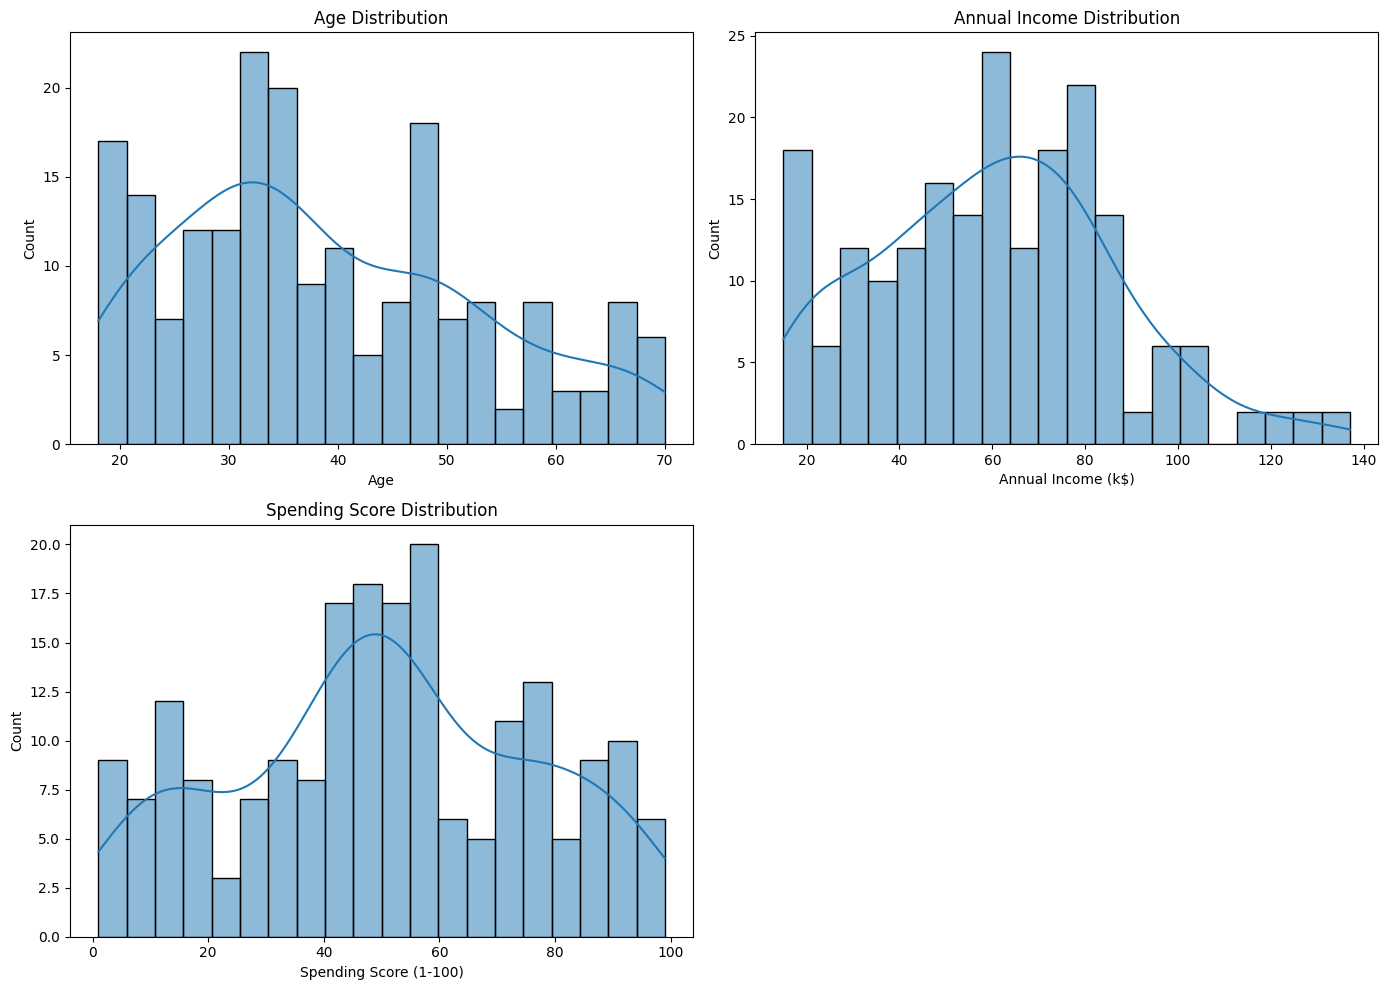

In [2]:
# Load the dataset
df = pd.read_csv('Mall Customer Segmentation Dataset/Mall_Customers.csv')

# Display 
print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Data types and missing values
print("\nData types and missing values:")
print(df.info())
print(df.isnull().sum())

# Distribution of categorical features
print("\nGender distribution:")
print(df['Gender'].value_counts())

# Visualize distribution of numerical features
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [7]:
# Check unique values in the 'Gender' column
print("\nUnique values in the 'Gender' column:")
print(df['Gender'].unique())



Unique values in the 'Gender' column:
[nan]


In [9]:
# Handle missing values in 'Gender'
if df['Gender'].isnull().any():
    mode_gender = df['Gender'].mode()
    if not mode_gender.empty:
        most_frequent_gender = mode_gender[0]
        df['Gender'].fillna(most_frequent_gender, inplace=True)
    else:
        print("Mode calculation returned no values.")


Mode calculation returned no values.


In [11]:
# Reload the dataset to check the original Gender values
df_original = pd.read_csv('Mall Customer Segmentation Dataset/Mall_Customers.csv')  

# Check unique values in the original 'Gender' column
print("\nUnique values in the original 'Gender' column:")
print(df_original['Gender'].unique())

# Re-map Gender column based on the original data
df['Gender'] = df_original['Gender'].map({'Male': 0, 'Female': 1})

# Handle missing values in 'Gender'
if df['Gender'].isnull().any():
    mode_gender = df['Gender'].mode()
    if not mode_gender.empty:
        most_frequent_gender = mode_gender[0]
        df['Gender'].fillna(most_frequent_gender, inplace=True)
    else:
        print("Mode calculation returned no values.")

# Drop the CustomerID column if it exists
df = df.drop('CustomerID', axis=1, errors='ignore')

# Check for missing values again after handling them
print("\nMissing values after handling:")
print(df.isnull().sum())

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



Unique values in the original 'Gender' column:
['Male' 'Female']

Missing values after handling:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Determine Optimal Number of Clusters


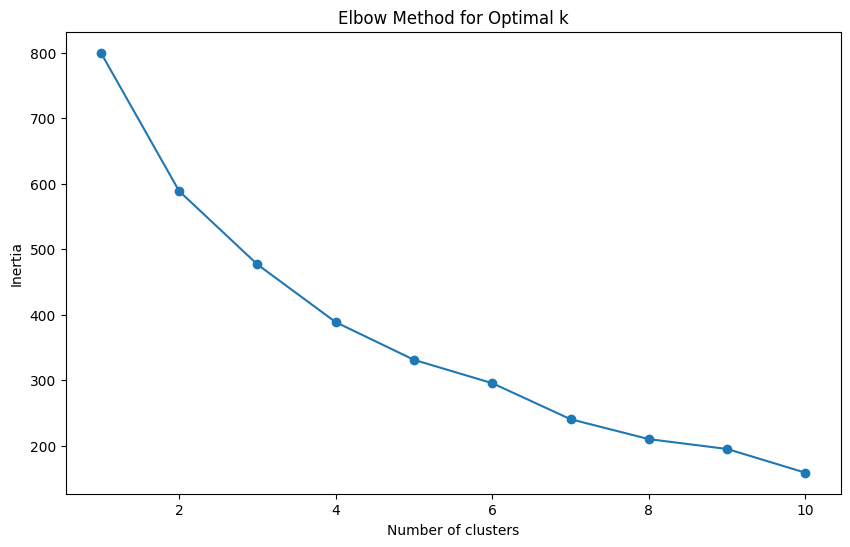

In [12]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


# Perform K-Means Clustering

In [13]:
# Fit K-means with the optimal number of clusters (e.g., 5 based on elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows with cluster labels
print("First few rows with cluster labels:")
print(df.head())


First few rows with cluster labels:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        4
1       0   21                  15                      81        4
2       1   20                  16                       6        2
3       1   23                  16                      77        1
4       1   31                  17                      40        1


# Visualize Clusters

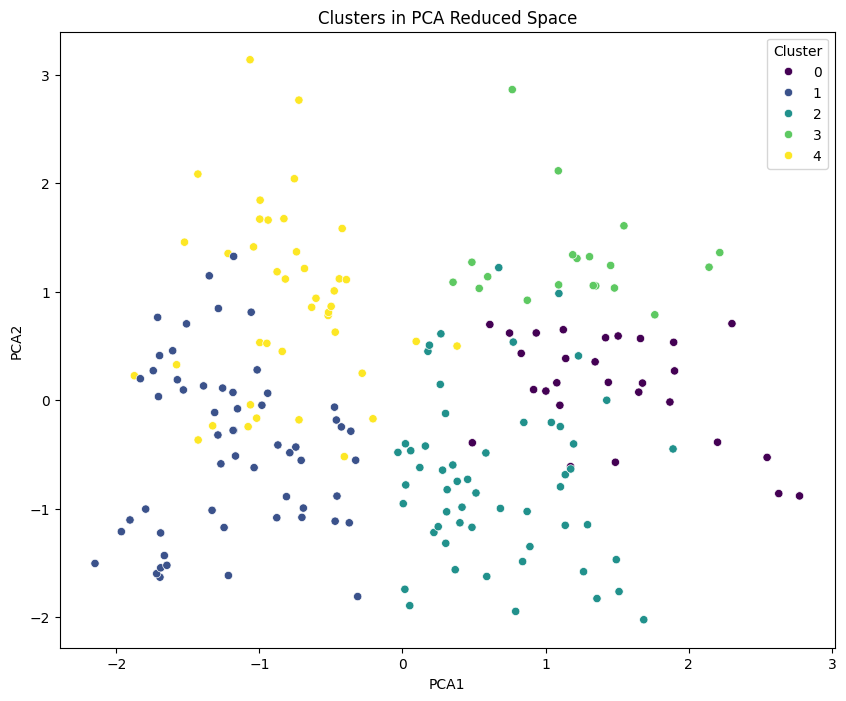

In [14]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Plot clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, legend='full')
plt.title('Clusters in PCA Reduced Space')
plt.show()


# Evaluate the Clustering

In [15]:
# Compute silhouette score
sil_score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.31780697133020747


# Analyze Clusters


Average feature values by cluster:
         Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                               
0           0.0  57.214286           46.785714               38.714286
1           1.0  28.438596           59.666667               67.684211
2           1.0  48.109091           58.818182               34.781818
3           0.0  38.473684           85.894737               14.210526
4           0.0  28.536585           61.804878               71.097561


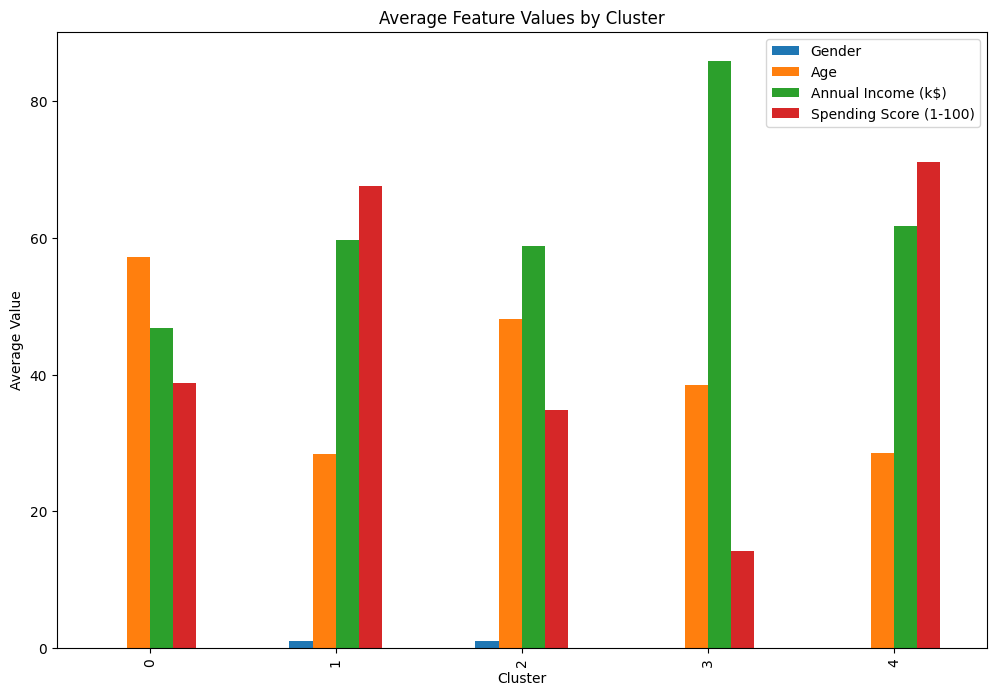

In [16]:
# Calculate the mean of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()
print("\nAverage feature values by cluster:")
print(cluster_means)

# Optional: Visualize the means for better understanding
cluster_means.plot(kind='bar', figsize=(12, 8))
plt.title('Average Feature Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.show()
